## Change Over Time Analysis

This analysis sought to graph the average sentiment scores grouped by date. The aim was to see if there are any temporal trends in the sentiments of tweets. This analysis uses the VADER "Compound Score," which is a normalized measurement of positive or negative sentiment for a line of content. The Compound Score ranges between 1 (Extremely Positive) and -1 (Extremely Negative), with 0 representing neutral text.

The first portion of this analysis involved importing the dependent libraries (PANDAs and Matplotlib) and reading in the CSV of the full set of English-language tweets (about 2.1 million tweets).

In [23]:
# Allows plots to be visible and stored within this notebook.
%matplotlib inline

In [24]:
# Import dependencies (PANDAs and Matplotlib)

import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Specify the location for the full data CSV, read the CSV into a dataframe, and preview the dataframe.
csv_path = "/Users/timst.onge/Russian-Troll-Tweets-Sentiment-Analysis/all_data.csv"
df = pd.read_csv(csv_path, low_memory=False)

df.head()

,tweet_id,Compound_Score,Positive_Score,Negative_Score,Neutral_Score,external_author_id,author,content,region,language,...,account_type,retweet,account_category,new_june_2018,alt_external_id,article_url,tco1_step1,tco2_step1,tco3_step1,new_publish_date
0,914580356430536707,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,2017-10-01 19:58:00
1,914621840496189440,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,2017-10-01 22:43:00
2,914623490375979008,-0.1531,0.126,0.198,0.676,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,...,Right,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,2017-10-01 22:50:00
3,914639143690555392,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,2017-10-01 23:52:00
4,914312219952861184,0.6399,0.413,0.000,0.587,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,...,Right,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,2017-10-01 02:13:00


Isolating the "date" of each tweet required two steps. First, a new field in the dataframe was created to store the contents of the "publish_date" but formatted in "datetime" format. This allows for the element to be processed as a date, rather than strings and/or integers that only symbolize the date. This also allows for the next step to occur: parsing out the "date" of each published tweet from the new field, since the new field holds the hour-time of the tweet in addition to the calendar date. For this analysis, we are only concerned with the calendar date.

In [26]:
# Convert the "new_publish_date" field to the "publish_date" data and format it in datetime.
df['new_publish_date'] = pd.to_datetime(df['publish_date'])

# Create a new "date" field and populate it with the "date" element of the "new_publish_date" field. 
df['date'] = df['new_publish_date'].dt.date

# Preview the changed dataframe.
df.head()

,tweet_id,Compound_Score,Positive_Score,Negative_Score,Neutral_Score,external_author_id,author,content,region,language,...,retweet,account_category,new_june_2018,alt_external_id,article_url,tco1_step1,tco2_step1,tco3_step1,new_publish_date,date
0,914580356430536707,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,...,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,2017-10-01 19:58:00,2017-10-01
1,914621840496189440,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,...,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,2017-10-01 22:43:00,2017-10-01
2,914623490375979008,-0.1531,0.126,0.198,0.676,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,...,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,2017-10-01 22:50:00,2017-10-01
3,914639143690555392,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,...,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,2017-10-01 23:52:00,2017-10-01
4,914312219952861184,0.6399,0.413,0.000,0.587,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,...,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,2017-10-01 02:13:00,2017-10-01


The next step in processing the data for analysis is to calculate the average "Compound Score" for calendar date's worth of tweets. This means that the dataframe first needs to be grouped by the newly created "date" field. After this, the mean Compound Score is calculated and stored in a new dataframe, with its index being the date.

In [27]:
# Group the dataframe by the "date", calculate the mean Compound Score for every date, and save the results.
avg_compound_date = df.groupby(["date"]).mean()["Compound_Score"]

In [28]:
# Create a dataframe with the average compound date (index is the date). Then preview the results.
df_date_summary = pd.DataFrame({"Avg Compound": avg_compound_date})
df_date_summary.head()

,Avg Compound
date,
2012-02-06,0.4019
2012-02-07,0.9324
2012-02-08,0.0000
2012-02-14,0.0000
2012-02-29,0.4215


We now have the average Compound Score for tweets on each date in the dataset. Now we will generate a line graph with the date along the x-axis and the average Compound Score for sentiment along the y-axis. This will allow us to see how tweet sentiment may have changed over time.

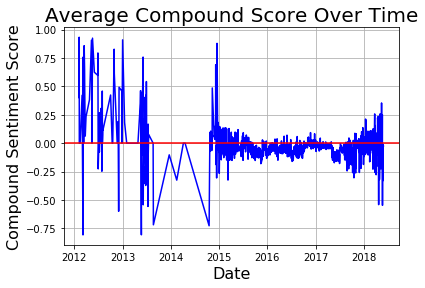

In [29]:
# Convert the dates and sentiment dataframes into lists to allow for graphing.
date_list = df_date_summary.index.tolist()
avg_com_list = df_date_summary["Avg Compound"]

# Plot the average compound sentiments with date_list on x-axis, avg_com_list on y-axis, color in blue and add label.
[avg_compound_line] = plt.plot(date_list, avg_com_list, color="blue", label="Average Compound Score")

# Set graph parameters, including title, axes labels, red line on y=0, and a grid over the graph.
plt.title("Average Compound Score Over Time", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Compound Sentiment Score', fontsize=16)
plt.axhline(color="red")
plt.grid()

# Save the figure as a PNG file and then show the final graph.
plt.savefig("/Users/timst.onge/Russian-Troll-Tweets-Sentiment-Analysis/avg_compound1.png")
plt.show()

This initial look at sentiment over time gave us some strange results, particularly in the first half of the time period. Tweet sentiment before 2015 was spiky and erratic, while post-2015 tweets followed a smoother trend. We also thought it was strange that tweets dated back to 2012, which appears to be very early for the Russian troll tweets to have begun. We decided to create a simple graph of the total number of tweets sent on each date in the data in order to investigate what might be going on here. 

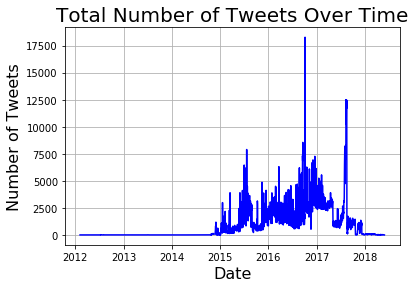

In [30]:
# By calculating the "count" of Compound Score when grouped by date, we essentially get the number of tweets per day.
count_compound_date = df.groupby(["date"]).count()["Compound_Score"]
df_date_count = pd.DataFrame({"Count Compound": count_compound_date})
df_count_list = df_date_count["Count Compound"]

# Plot the Compound Score count over the dates.
[tweet_count] = plt.plot(date_list, df_count_list, color="blue", label="Tweets per Day" )

# Establish plot settings for the Total Number of Tweets Over Time
plt.title("Total Number of Tweets Over Time", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Tweets', fontsize=16)
plt.grid()

# Save the figure as a PNG and display the graph.
plt.savefig("/Users/timst.onge/Russian-Troll-Tweets-Sentiment-Analysis/total_tweets.png")
plt.show()

Looking at the graph of total tweets, it is clear what the issue is: there are very few tweets in the dataset from before 2015, which leads to the sentiment score day being quite erratic when averaged over time.

Based on the [analysis done by FiveThirtyEight](https://fivethirtyeight.com/features/why-were-sharing-3-million-russian-troll-tweets/), who also created a graph of total tweets over time, we can explain some of the temporal patterns. As FiveThirtyEight points out, the major spike towards the end of 2017 occurred on October 6, 2016, which was right before WikiLeaks released their first batch of Clinton campaign emails. FiveThirtyEight offers no concrete explanation (and we are unsure ourselves) for the next spike in tweets during the Summer of 2017. We are also not sure why tweets dating back to 2012 are included in the data, as this seems offly early to be part of this Twitter campaign. Especially because there are so few tweets in this time period, perhaps these data points are included by mistake or error?

Looking into the data, we found that the pre-2015 tweets accounted for less than 200 of the 1,377 dates on which tweets were sent. Therefore, we decided to graph a truncated section of the timeline (2015 onwards) by only showing the last 1,200 dates of data. The resulting graph is below:

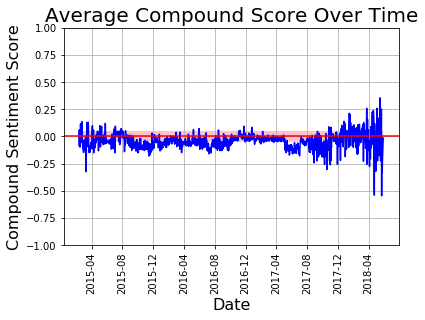

In [31]:
# Truncate the dates and average compound score lists to return only the last 1,200 data points, and save them to
# new variables.
late_dates = date_list[-1200:]
late_com = avg_com_list[-1200:]

# Plot the truncated dates and average compound score lists
[trunc_com] = plt.plot(late_dates, late_com, color="blue", label="Average Compound Score" )

# Establish graph settings for the new Average Compound Score Over Time graph.
plt.title("Average Compound Score Over Time", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Compound Sentiment Score', fontsize=16)
plt.fill_between(late_dates, -.05, .05, facecolor='pink', alpha=1)
plt.xticks(rotation=90)
plt.ylim(-1, 1)
plt.axhline(color="red")
plt.grid()

# Save the figure as a PNG and display the graph.
plt.savefig("/Users/timst.onge/Russian-Troll-Tweets-Sentiment-Analysis/avg_compound2.png")
plt.show()

When visualizing the final graph of average Compound Score over time, we can see a more condensed view of the data, with most of the averages hovering around 0 (neutral). The pink area between -.05 and .05 indicates the "neutral zone, as indicated in the VADER documentation, where content should essentially be seen as classified as neutral. For most of the time period, average scores hover near the neutral zone. We do see a wider range in average sentiment towards the tail end of the date range, particularly beginning in 2018, where the average scores reach towards the extremes (in mid-2018, some average day scores surpass -.5, indicating largely negative sentiments). A closer look at the data may reveal more minor temporal trends in sentiment, but because scores are still largely conentrated around the neutral zone, it may be difficult to reveal concrete reasonings for these trends.